In [10]:
import pandas as pd
import matplotlib as plt
% matplotlib inline

In [11]:
df = pd.read_csv('job_skills.csv')

In [12]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


### Company types

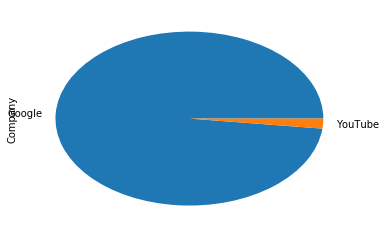

In [30]:
df["Company"].value_counts().plot(kind='pie')

## Lets consider whole dataset to be one entity first. Later we'll do comparision between Google and YouTube

### Job categories

In [15]:
df["Category"].value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 101
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   74
Partnerships                         60
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Software Engineering                 31
Sales Operations                     31
Hardware Engineering                 26
Real Estate & Workplace Services     25
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
IT & Data Management                  5
Technical Writing                     5
Developer Relations                   5
Data Center & Network                 2
Name: Category, dtype: int64

### Jobs by country

In [17]:
df["Country"] = df["Location"].apply(lambda x : x.split(",")[-1].strip())

In [173]:
df["Country"].value_counts()

United States                   638
Ireland                          87
United Kingdom                   62
Germany                          54
Singapore                        41
China                            38
Australia                        35
Japan                            31
Taiwan                           30
India                            28
Switzerland                      22
France                           20
Brazil                           15
Mexico                           11
Israel                           11
Poland                           11
Hong Kong                         9
South Korea                       9
Canada                            8
Russia                            8
Netherlands                       7
Sweden                            7
Italy                             6
Colombia                          5
Indonesia                         5
Norway                            5
Argentina                         5
Turkey                      

### Finance Jobs by countries

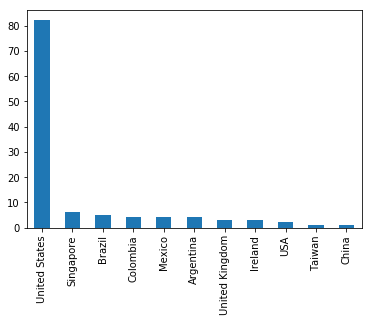

In [21]:
df[df["Category"] == "Finance"]["Country"].value_counts().plot(kind="bar")

### Software Engineering jobs by countries

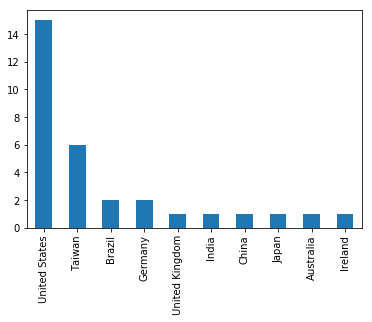

In [22]:
df[df["Category"] == "Software Engineering"]["Country"].value_counts().plot(kind="bar")

### Location which has most Software Engineering jobs in United States

In [29]:
df[(df["Category"] == "Software Engineering") & (df["Country"] == "United States")]["Location"].value_counts()

South San Francisco, CA, United States    4
Mountain View, CA, United States          4
Pittsburgh, PA, United States             2
New York, NY, United States               2
Irvine, CA, United States                 1
Sunnyvale, CA, United States              1
Cambridge, MA, United States              1
Name: Location, dtype: int64

### Text mining job responsibilities

#### Tokenize responsibilities

In [52]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [54]:
df["Responsibilities"] = df["Responsibilities"].astype(str)
df["Resp_tokens"] = df["Responsibilities"].apply(word_tokenize)

In [68]:
stopWords = set(stopwords.words('english'))
def removeStopWords(w):
        return " ".join([i for i in w if i not in stopWords])

In [69]:
df["Resp_filtered"] = df["Resp_tokens"].apply(removeStopWords)

#### TF-idf vectorizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
df['Responsibilities_vect'] = list(v.fit_transform(df['Resp_filtered']).toarray())

#### K means clustering for software engineering role

In [71]:
from sklearn.cluster import KMeans

In [77]:
df_software = df[df["Category"] == "Software Engineering"]

In [127]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(list(df_software['Responsibilities_vect']))

In [128]:
df_software["cluster"] = kmeans.labels_

C:\Users\Born_2_Code\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
df_software[["cluster", "Country"]].groupby(["Country", "cluster"]).count()

Empty DataFrame
Columns: []
Index: [(Australia, 3), (Brazil, 0), (Brazil, 2), (China, 3), (Germany, 3), (India, 2), (Ireland, 3), (Japan, 0), (Taiwan, 0), (Taiwan, 2), (United Kingdom, 2), (United States, 0), (United States, 1), (United States, 2), (United States, 3)]

#### k means clustering for finanace role

In [149]:
df_finance = df[df["Category"] == "Finance"]

In [150]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(list(df_finance['Responsibilities_vect']))

In [151]:
df_finance["cluster"] = kmeans.labels_

C:\Users\Born_2_Code\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
df_finance[["cluster", "Country"]].groupby(['Country', 'cluster']).count()

Empty DataFrame
Columns: []
Index: [(Argentina, 2), (Brazil, 0), (Brazil, 2), (China, 1), (Colombia, 2), (Ireland, 0), (Ireland, 1), (Mexico, 2), (Singapore, 0), (Singapore, 1), (Singapore, 3), (Taiwan, 1), (USA, 0), (United Kingdom, 0), (United States, 0), (United States, 1), (United States, 2)]

we can observe that responsibility 3 is unique for singapore only.

In [174]:
df_finance[df_finance["cluster"] == 3]["Title"].value_counts()

Business Intern 2018    3
Name: Title, dtype: int64

In [177]:
df_finance[df_finance["cluster"] == 3]["Responsibilities"].iloc[0]

'Job responsibilities and detailed projects will be determined based on your educational background, interests and skills.'

## Number of intern roles by country

In [155]:
def isIntern(w):
    words = w.split(" ")
    for word in words:
        if word.lower() == "intern":
            return 1
    return 0

In [156]:
df["Intern"] = df["Title"].apply(isIntern)

In [158]:
df[df["Intern"] == 1]["Country"].value_counts()

China                           8
Singapore                       7
South Korea                     5
Indonesia                       4
Taiwan                          4
Thailand                        4
Brazil                          4
Colombia                        4
Mexico                          4
Hong Kong                       4
Argentina                       4
Germany                         2
Poland                          2
Australia                       2
Netherlands                     1
South Africa                    1
Turkey                          1
Norway                          1
Dubai - United Arab Emirates    1
Ireland                         1
Finland                         1
Denmark                         1
Kenya                           1
Ukraine                         1
Switzerland                     1
Nigeria                         1
Lithuania                       1
Portugal                        1
Czechia                         1
Slovakia      

#### Countries which does not have Intern roles

In [165]:
list(set(df.Country) - set(df[df["Intern"] == 1]["Country"]))

['Canada', 'India', 'United States', 'Japan', 'Philippines', 'Israel', 'USA']

## Number of Manager roles by country

In [166]:
def isManager(w):
    words = w.split(" ")
    for word in words:
        if word.lower() == "manager":
            return 1
    return 0

In [167]:
df["Manager"] = df["Title"].apply(isManager)

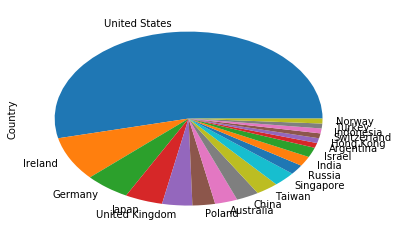

In [169]:
df[df["Manager"] == 1]["Country"].value_counts().plot(kind="pie")

we can observe that united states has most of managorial roles i.e. most of company decisions are taken in United States

## Google vs YouTube